<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## Custom embedddings con Gensim



### Objetivo
El objetivo es utilizar documentos / corpus para crear embeddings de palabras basado en ese contexto. Se utilizará canciones de bandas para generar los embeddings, es decir, que los vectores tendrán la forma en función de como esa banda haya utilizado las palabras en sus canciones.

In [1]:
!pip install numpy==1.26.4 pandas==2.2.2 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 27.2 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.

In [1]:
!pip install gensim==4.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import multiprocessing
from gensim.models import Word2Vec

### Datos
Utilizaremos como dataset canciones de bandas de habla inglesa.

In [3]:
import os

# Verificar si el directorio ya existe
if not os.access('./songs_dataset', os.F_OK):
    # Verificar si el archivo ZIP ya fue descargado
    if not os.access('songs_dataset.zip', os.F_OK):
        # Descargar el archivo ZIP desde GitHub usando curl
        !curl -L https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/raw/main/datasets/songs_dataset.zip -o songs_dataset.zip
    # Descomprimir el archivo ZIP
    !unzip -q songs_dataset.zip
else:
    print("El dataset ya se encuentra descargado")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2026k  100 2026k    0     0  1634k      0  0:00:01  0:00:01 --:--:--  9.8M


In [4]:
# Posibles bandas
os.listdir("./songs_dataset/")

['johnny-cash.txt',
 'lady-gaga.txt',
 'eminem.txt',
 'r-kelly.txt',
 'Lil_Wayne.txt',
 'lil-wayne.txt',
 'kanye.txt',
 'janisjoplin.txt',
 'paul-simon.txt',
 'Kanye_West.txt',
 'michael-jackson.txt',
 'rihanna.txt',
 'dolly-parton.txt',
 'joni-mitchell.txt',
 'amy-winehouse.txt',
 'bjork.txt',
 'missy-elliott.txt',
 'alicia-keys.txt',
 'prince.txt',
 'jimi-hendrix.txt',
 'dickinson.txt',
 'beatles.txt',
 'dj-khaled.txt',
 'leonard-cohen.txt',
 'lorde.txt',
 'bob-marley.txt',
 'bob-dylan.txt',
 'dr-seuss.txt',
 'bruno-mars.txt',
 'notorious-big.txt',
 'al-green.txt',
 'nirvana.txt',
 'patti-smith.txt',
 'kanye-west.txt',
 'ludacris.txt',
 'notorious_big.txt',
 'drake.txt',
 'adele.txt',
 'lin-manuel-miranda.txt',
 'bieber.txt',
 'nursery_rhymes.txt',
 'nicki-minaj.txt',
 'bruce-springsteen.txt',
 'nickelback.txt',
 'disney.txt',
 'britney-spears.txt',
 'cake.txt',
 'radiohead.txt',
 'blink-182.txt']

### 0 EDA

In [44]:
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import CountVectorizer

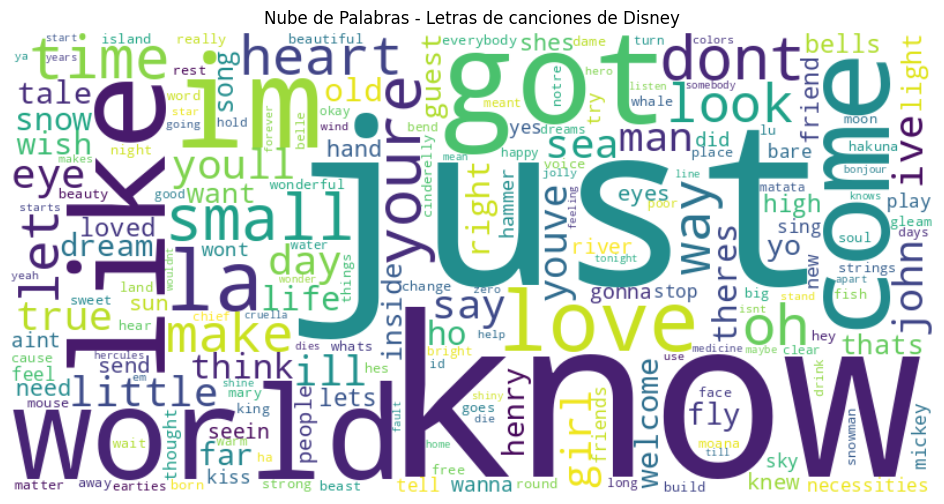

In [45]:
# Cargar el archivo de texto
with open("/content/songs_dataset/disney.txt", "r", encoding="utf-8") as file:
    disney_text = file.read()

# Limpieza básica
disney_text_cleaned = re.sub(r'\n+', ' ', disney_text)  # Eliminar saltos de línea múltiples
disney_text_cleaned = re.sub(r'[^a-zA-Z\s]', '', disney_text_cleaned)  # Eliminar caracteres no alfabéticos
disney_text_cleaned = disney_text_cleaned.lower()

# Vectorización simple para conteo de palabras
vectorizer = CountVectorizer(stop_words='english')
word_matrix = vectorizer.fit_transform([disney_text_cleaned])
word_counts = pd.DataFrame(word_matrix.toarray(), columns=vectorizer.get_feature_names_out()).T
word_counts.columns = ['count']
word_counts = word_counts.sort_values('count', ascending=False)

# Crear nubes de palabras para visualización
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts['count'])

# Mostrar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Letras de canciones de Disney')
plt.show()

Palabras mas frecuentes en Disney

In [47]:
word_counts.head(10)

,count
just,107
know,104
world,83
like,83
got,82
im,81
come,72
love,70
la,69
small,66


In [6]:
# Armar el dataset utilizando salto de línea para separar las oraciones/docs
df = pd.read_csv('songs_dataset/disney.txt', sep='/n', header=None)
df.head()

<ipython-input-6-802f6c0af91f>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('songs_dataset/disney.txt', sep='/n', header=None)


,0
0,When somebody loved me
1,Everything was beautiful
2,Every hour we spent together
3,Lives within my heart And when she was sad
4,I was there to dry her tears


In [7]:
print("Cantidad de documentos:", df.shape[0])

Cantidad de documentos: 2499


### 1 - Preprocesamiento

In [9]:
!pip install tensorflow

In [12]:
#from keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import text_to_word_sequence

sentence_tokens = []
# Recorrer todas las filas y transformar las oraciones
# en una secuencia de palabras (esto podría realizarse con NLTK o spaCy también)
for _, row in df[:None].iterrows():
    sentence_tokens.append(text_to_word_sequence(row[0]))

In [13]:
# Demos un vistazo
sentence_tokens[:2]

[['when', 'somebody', 'loved', 'me'], ['everything', 'was', 'beautiful']]

### 2 - Crear los vectores (word2vec)

In [14]:
from gensim.models.callbacks import CallbackAny2Vec
# Durante el entrenamiento gensim por defecto no informa el "loss" en cada época
# Sobrecargamos el callback para poder tener esta información
class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss

In [15]:
# Crearmos el modelo generador de vectores
# En este caso utilizaremos la estructura modelo Skipgram
w2v_model = Word2Vec(min_count=5,    # frecuencia mínima de palabra para incluirla en el vocabulario
                     window=2,       # cant de palabras antes y desp de la predicha
                     vector_size=300,       # dimensionalidad de los vectores
                     negative=20,    # cantidad de negative samples... 0 es no se usa
                     workers=1,      # si tienen más cores pueden cambiar este valor
                     sg=1)           # modelo 0:CBOW  1:skipgram

In [16]:
# Obtener el vocabulario con los tokens
w2v_model.build_vocab(sentence_tokens)

In [17]:
# Cantidad de filas/docs encontradas en el corpus
print("Cantidad de docs en el corpus:", w2v_model.corpus_count)

Cantidad de docs en el corpus: 2499


In [18]:
# Cantidad de words encontradas en el corpus
print("Cantidad de words distintas en el corpus:", len(w2v_model.wv.index_to_key))

Cantidad de words distintas en el corpus: 535


### 3 - Entrenar embeddings

In [19]:
# Entrenamos el modelo generador de vectores
# Utilizamos nuestro callback
w2v_model.train(sentence_tokens,
                 total_examples=w2v_model.corpus_count,
                 epochs=20,
                 compute_loss = True,
                 callbacks=[callback()]
                 )

Loss after epoch 0: 139809.6875
Loss after epoch 1: 76958.71875
Loss after epoch 2: 75630.75
Loss after epoch 3: 74938.4375
Loss after epoch 4: 73700.8125
Loss after epoch 5: 74565.34375
Loss after epoch 6: 75929.875
Loss after epoch 7: 73588.5
Loss after epoch 8: 74122.5
Loss after epoch 9: 72796.125
Loss after epoch 10: 72552.8125
Loss after epoch 11: 70682.75
Loss after epoch 12: 70042.5
Loss after epoch 13: 63759.8125
Loss after epoch 14: 60933.625
Loss after epoch 15: 60333.75
Loss after epoch 16: 60269.25
Loss after epoch 17: 60107.125
Loss after epoch 18: 59576.375
Loss after epoch 19: 58719.0


(187145, 350840)

### 4 - Ensayar

In [21]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["love"], topn=10)

[('more', 0.922218382358551),
 ('than', 0.9067693948745728),
 ("you'll", 0.9046448469161987),
 ('last', 0.892278790473938),
 ('find', 0.8921127319335938),
 ('learn', 0.8874883651733398),
 ('tonight', 0.8834723234176636),
 ('feel', 0.8777900338172913),
 ('thought', 0.8757887482643127),
 ('way', 0.8735491633415222)]

In [23]:
# Palabras que MENOS se relacionan con...:
w2v_model.wv.most_similar(negative=["home"], topn=10)

[('tale', -0.5290398001670837),
 ('bells', -0.5509555339813232),
 ('after', -0.5695157647132874),
 ('old', -0.5731942057609558),
 ('john', -0.574752688407898),
 ('small', -0.5761951804161072),
 ('as', -0.5779281854629517),
 ('world', -0.5809981822967529),
 ('whale', -0.5821472406387329),
 ('dee', -0.5834283232688904)]

In [48]:
positive_words = [
    "love",       # amor
    "dream",      # sueño
    "magic",      # magia
    "hope",       # esperanza
    "believe",    # creer
    "friend",     # amistad
    "heart",      # corazón
    "wish",       # deseo
    "happy",      # felicidad
    "freedom"     # libertad
]


In [49]:
negative_words = [
    "fear",       # miedo
    "lonely",     # soledad
    "pain",       # dolor
    "fire",       # fuego (como castigo, infierno en algunos contextos)
    "dark",       # oscuridad
    "hate",       # odio
    "burn",       # quemar
    "lost",       # pérdida
    "cry",        # llanto
    "monster"     # monstruo
]


In [50]:
# Función para obtener los top 5 similares
def get_top_similar_words(word_list, model, topn=5):
    result = {}
    for word in word_list:
        if word in model.wv.key_to_index:
            similar_words = model.wv.most_similar(positive=[word], topn=topn)
            result[word] = similar_words
        else:
            result[word] = f"{word} no está en el vocabulario."
    return result

In [52]:
# Obtener palabras más similares
positive_similarities = get_top_similar_words(positive_words, w2v_model)
negative_similarities = get_top_similar_words(negative_words, w2v_model)

Similaridades Positivas

In [56]:
pd.DataFrame(positive_similarities).T

,0,1,2,3,4
love,"(more, 0.922218382358551)","(than, 0.9067693948745728)","(you'll, 0.9046448469161987)","(last, 0.892278790473938)","(find, 0.8921127319335938)"
dream,"(upon, 0.9659962058067322)","(wish, 0.8982151746749878)","(did, 0.8941375613212585)","(once, 0.870258629322052)","(star, 0.8632205724716187)"
magic,"(deal, 0.9904263615608215)","(hot, 0.9883809685707092)","(we've, 0.9854090809822083)","(dreaming, 0.9846473932266235)","(name, 0.9840444326400757)"
hope,"(great, 0.9876337647438049)","(leave, 0.987177848815918)","(bright, 0.9852660894393921)","(mary, 0.9834383130073547)","(round, 0.982668399810791)"
believe,"(lead, 0.9922456741333008)","(path, 0.989908754825592)","(guess, 0.9895724058151245)","(cry, 0.9895241260528564)","(while, 0.9893943667411804)"
friend,"(had, 0.9413434267044067)","(you've, 0.9403451681137085)","(i've, 0.92673659324646)","(got, 0.9204878807067871)","(been, 0.9031662940979004)"
heart,"(my, 0.9368848204612732)","(in, 0.8880547285079956)","(here, 0.8880146145820618)","(would, 0.8816394805908203)","(within, 0.878869354724884)"
wish,"(dream, 0.8982152342796326)","(star, 0.893653392791748)","(yet, 0.8923652768135071)","(dreams, 0.8921618461608887)","(could, 0.8880264759063721)"
happy,"('eart, 0.9880030751228333)","(strange, 0.9875314831733704)","(sad, 0.98689204454422)","(roll, 0.9868265390396118)","(unfortunate, 0.9861575365066528)"
freedom,freedom no está en el vocabulario.,freedom no está en el vocabulario.,freedom no está en el vocabulario.,freedom no está en el vocabulario.,freedom no está en el vocabulario.


Similaridades Negativas u Opuestas

In [58]:
pd.DataFrame(negative_similarities).T

,0,1,2,3,4
fear,"(fun, 0.9971569776535034)","(nice, 0.9947656393051147)","(daughter, 0.9945942759513855)","(found, 0.9943125247955322)","(secret, 0.9942723512649536)"
lonely,"(shiny, 0.9913641810417175)","(while, 0.9911661148071289)","(nothing, 0.9904705286026001)","(moment, 0.9902330636978149)","(dancing, 0.9901401400566101)"
pain,pain no está en el vocabulario.,pain no está en el vocabulario.,pain no está en el vocabulario.,pain no está en el vocabulario.,pain no está en el vocabulario.
fire,"(starts, 0.9794069528579712)","(earth, 0.9723392724990845)","(maui, 0.966547429561615)","(nights, 0.9653257727622986)","(strength, 0.9645174741744995)"
dark,"(these, 0.9823582768440247)","(wrong, 0.9823364615440369)","(days, 0.9801172018051147)","(big, 0.9790413975715637)","(beauty, 0.9787141680717468)"
hate,hate no está en el vocabulario.,hate no está en el vocabulario.,hate no está en el vocabulario.,hate no está en el vocabulario.,hate no está en el vocabulario.
burn,"(hold, 0.990385890007019)","(nothing, 0.988716185092926)","(again, 0.9875286817550659)","(tight, 0.9864883422851562)","(call, 0.9862105250358582)"
lost,lost no está en el vocabulario.,lost no está en el vocabulario.,lost no está en el vocabulario.,lost no está en el vocabulario.,lost no está en el vocabulario.
cry,"(nice, 0.9940611124038696)","(mai, 0.9926518201828003)","(while, 0.9925007820129395)","(another, 0.9912187457084656)","(proud, 0.9907177090644836)"
monster,monster no está en el vocabulario.,monster no está en el vocabulario.,monster no está en el vocabulario.,monster no está en el vocabulario.,monster no está en el vocabulario.


### 5 - Visualizar agrupación de vectores

In [32]:
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
import numpy as np

def reduce_dimensions(model, num_dimensions = 2 ):

    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)

    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    return vectors, labels

In [33]:
# Graficar los embedddings en 2D
import plotly.graph_objects as go
import plotly.express as px

vecs, labels = reduce_dimensions(w2v_model)

MAX_WORDS=200
fig = px.scatter(x=vecs[:MAX_WORDS,0], y=vecs[:MAX_WORDS,1], text=labels[:MAX_WORDS])
fig.show(renderer="colab") # esto para plotly en colab

**Formación de clústeres semánticos:**

Se observa una concentración de palabras emocionalmente positivas en el cuadrante superior derecho: dream, love, wish, together, hope, way.

Otro conjunto relevante en la zona inferior incluye palabras más introspectivas o ambiguas como try, never, know, don't, people.

**Centro del gráfico (≈ (0, 0)):**

Contiene palabras versátiles y altamente conectadas como get, know, time, try, people, que funcionan como puentes entre distintos temas o emociones.


**Palabras específicas dispersas:**

Términos únicos como zip, bonjour, belle, mary, ham, guest están más alejados del centro.

Esto sugiere que son semánticamente más aislados o contextualmente limitados, usados en canciones concretas.



In [60]:
# Graficar los embedddings en 3D

vecs, labels = reduce_dimensions(w2v_model,3)

fig = px.scatter_3d(x=vecs[:MAX_WORDS,0], y=vecs[:MAX_WORDS,1], z=vecs[:MAX_WORDS,2],text=labels[:MAX_WORDS])
fig.update_traces(marker_size = 2)
fig.show(renderer="colab") # esto para plotly en colab